# Brownian motion

$$W(t) = \frac{z_0}{\sqrt{2\pi}}t + \frac{2}{\sqrt{\pi}}
\sum_{n=1}^{\infty} \frac{z_n}{n}\sin\left(n\frac{t}{2}\right)\quad,$$  
where 

$$z_i\sim\mathcal{N}[0,1]\quad.$$

In [100]:
def w(t,nmax=10,rng=None):
    from numpy.random import default_rng
    from numpy import sin, sqrt, pi, newaxis, arange
    
    z = rng.normal(size=(nmax,1))
    n = arange(1,nmax)[...,newaxis]
    a = (z[0,0]/sqrt(2)*t+2*(sin(n * t / 2) * z[1:,:] / n).sum(axis=0))/sqrt(pi)
    
    return a 

In [101]:
def W(t, nmax=10,rng=None):
    import numpy as np
    z = rng.normal(0, 1, nmax)
    s = z[0]*t/(2*np.pi)**0.5
    s += sum(np.sin(0.5*n*t)*z[n]/n for n in range(1, nmax))*2/np.pi**0.5
    return s

In [103]:
def plot_w(ntries=10,nmax=10,nstep=20,w=w):
    from numpy import linspace, pi 
    from numpy.random import default_rng 
    from matplotlib.pyplot import gca 
    
    rng = default_rng(12345)
    ax  = gca()
    
    t = linspace(0,2*pi,nstep)
    
    for _ in range(ntries):
        y = w(t,nmax,rng=rng)
        ax.plot(t,y)
        
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$W(t)$')
    

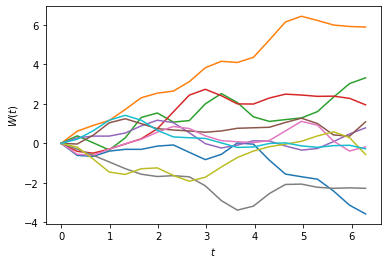

In [104]:
plot_w()

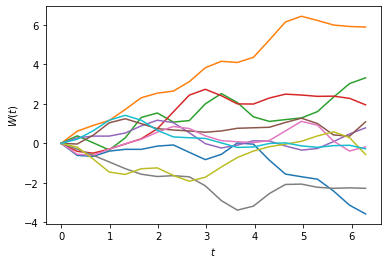

In [105]:
plot_w(w=W)

In [111]:
from numpy import linspace,pi 
from numpy.random import default_rng 

t = linspace(0,2*pi,100)
rng = default_rng()

In [112]:
%timeit w(t,rng=rng,nmax=20)

90.4 µs ± 604 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [113]:
%timeit W(t,rng=rng,nmax=20)

158 µs ± 516 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
